In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb=pd.read_csv('AB_NYC_2019.csv')
airbnb

id                                               name   host_id   
0          2539                 Clean & quiet apt home by the park      2787  \
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude   
0               John            Brooklyn          Kensington  40.64749  \
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews   
0      -73.97237     Private room    149               1                  9  \
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count   
0      2018-10-19               0.21                               6  \
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [7]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [9]:
airbnb.head(5)

host_id neighbourhood_group neighbourhood  latitude  longitude   
0     2787            Brooklyn    Kensington  40.64749  -73.97237  \
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews   
0     Private room    149               1                  9  \
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [10]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [11]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [12]:
#examine contineous variables
airbnb.describe()

host_id      latitude     longitude         price  minimum_nights   
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000  \
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count   
count       48895.000000       48895.000000                    48895.000000  \
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [13]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [14]:
airbnb.shape

(48895, 12)

In [15]:
airbnb.head()

host_id neighbourhood_group neighbourhood  latitude  longitude   
0     2787            Brooklyn    Kensington  40.64749  -73.97237  \
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews   
0     Private room    149               1                  9  \
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
#data visualization
import seaborn as sns

In [17]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
airbnb.head()

host_id neighbourhood_group neighbourhood  latitude  longitude   
0     2787            Brooklyn    Kensington  40.64749  -73.97237  \
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews   
0     Private room    149               1                  9  \
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
airbnb.head()

host_id neighbourhood_group neighbourhood  latitude  longitude   
0     2787            Brooklyn    Kensington  40.64749  -73.97237  \
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews   
0     Private room    149               1                  9  \
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Text(0.5, 1.0, 'Correlation Between Numeric Variables')

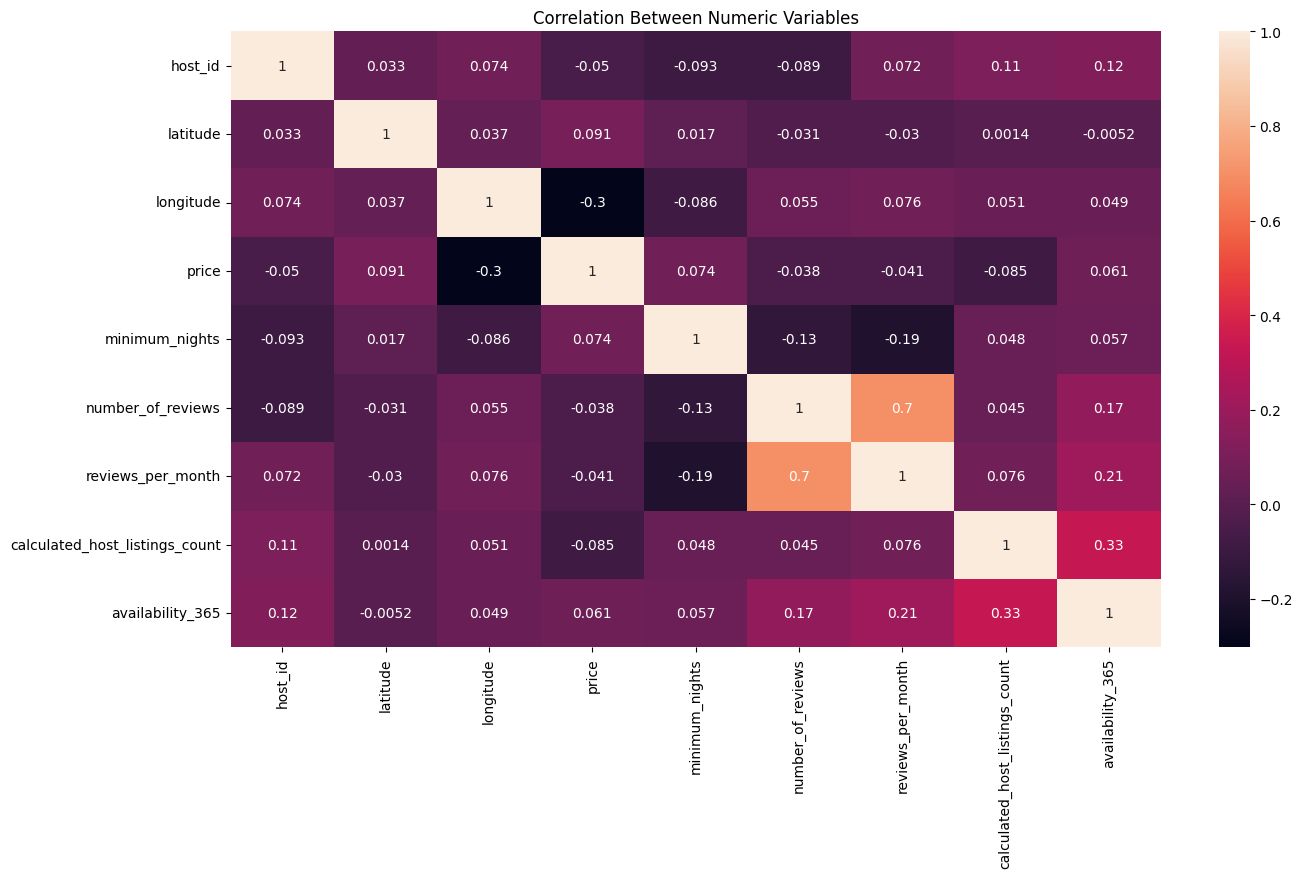

In [21]:
#Get Correlation between different variables

# Select only numeric columns from the DataFrame
numeric_columns = airbnb.select_dtypes(include=['number'])

# Calculate the correlation using the selected numeric columns
corr = numeric_columns.corr(method='kendall')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Between Numeric Variables')

In [22]:
airbnb.shape

(48895, 12)

In [23]:
airbnb.head(15)

host_id neighbourhood_group       neighbourhood  latitude  longitude   
0      2787            Brooklyn          Kensington  40.64749  -73.97237  \
1      2845           Manhattan             Midtown  40.75362  -73.98377   
2      4632           Manhattan              Harlem  40.80902  -73.94190   
3      4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4      7192           Manhattan         East Harlem  40.79851  -73.94399   
5      7322           Manhattan         Murray Hill  40.74767  -73.97500   
6      7356            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7      8967           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8      7490           Manhattan     Upper West Side  40.80178  -73.96723   
9      7549           Manhattan           Chinatown  40.71344  -73.99037   
10     7702           Manhattan     Upper West Side  40.80316  -73.96545   
11     7989           Manhattan      Hell's Kitchen  40.76076  -73.98867   
12     9744            Brooklyn         South Slope  40.66829  -73.98779   
13    11528           Manhattan     Upper West Side  40.79826  -73.96113   
14    11975           Manhattan        West Village  40.73530  -74.00525   

          room_type  price  minimum_nights  number_of_reviews   
0      Private room    149               1                  9  \
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
3   Entire home/apt     89               1                270   
4   Entire home/apt     80              10                  9   
5   Entire home/apt    200               3                 74   
6      Private room     60              45                 49   
7      Private room     79               2                430   
8      Private room     79               2                118   
9   Entire home/apt    150               1                160   
10  Entire home/apt    135               5                 53   
11     Private room     85               2                188   
12     Private room     89               4                167   
13     Private room     85               2                113   
14  Entire home/apt    120              90                 27   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                0.00                               1               365  
3                4.64                               1               194  
4                0.10                               1                 0  
5                0.59                               1               129  
6                0.40                               1                 0  
7                3.47                               1               220  
8                0.99                               1                 0  
9                1.33                               4               188  
10               0.43                               1                 6  
11               1.50                               1                39  
12               1.34                               3               314  
13               0.91                               1               333  
14               0.22                               1                 0

In [24]:
#Data Visulization

In [25]:
import seaborn as sns

In [26]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

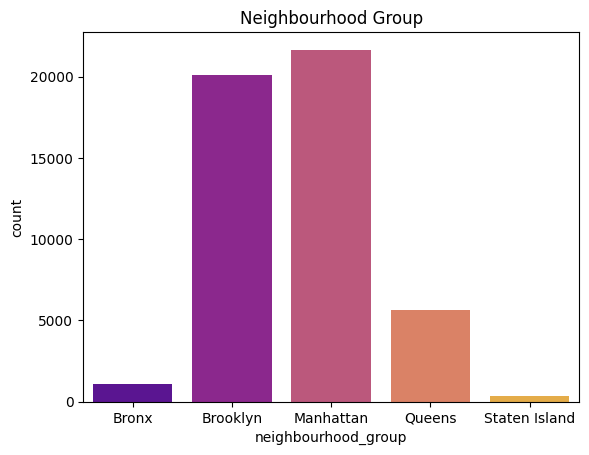

In [27]:
#Plot all Neighbourhood Group
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].astype('category')
sns.countplot(data=airbnb, x='neighbourhood_group', palette='plasma')
plt.title('Neighbourhood Group')
plt.show()

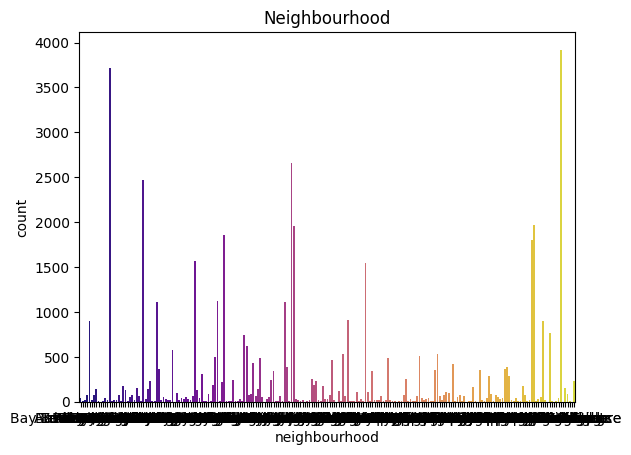

In [28]:
#neighbourhood
airbnb['neighbourhood'] = airbnb['neighbourhood'].astype('category')
sns.countplot(data=airbnb, x='neighbourhood', palette='plasma')
plt.title('Neighbourhood')
plt.show()

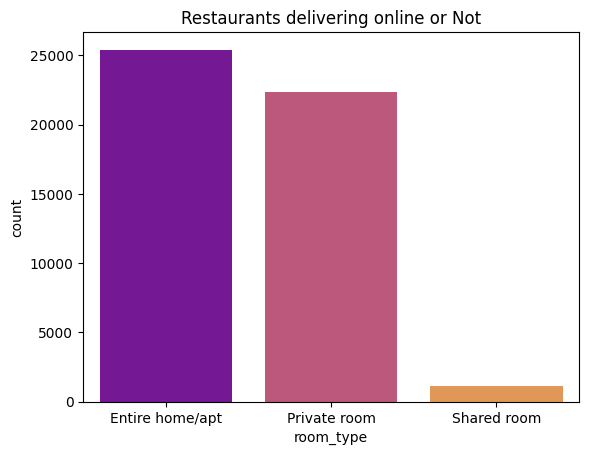

In [29]:
#Room Type
#Restaurants delivering Online or not
airbnb['room_type'] = airbnb['room_type'].astype('category')
sns.countplot(data=airbnb, x='room_type', palette='plasma')
plt.title('Restaurants delivering online or Not')
plt.show()

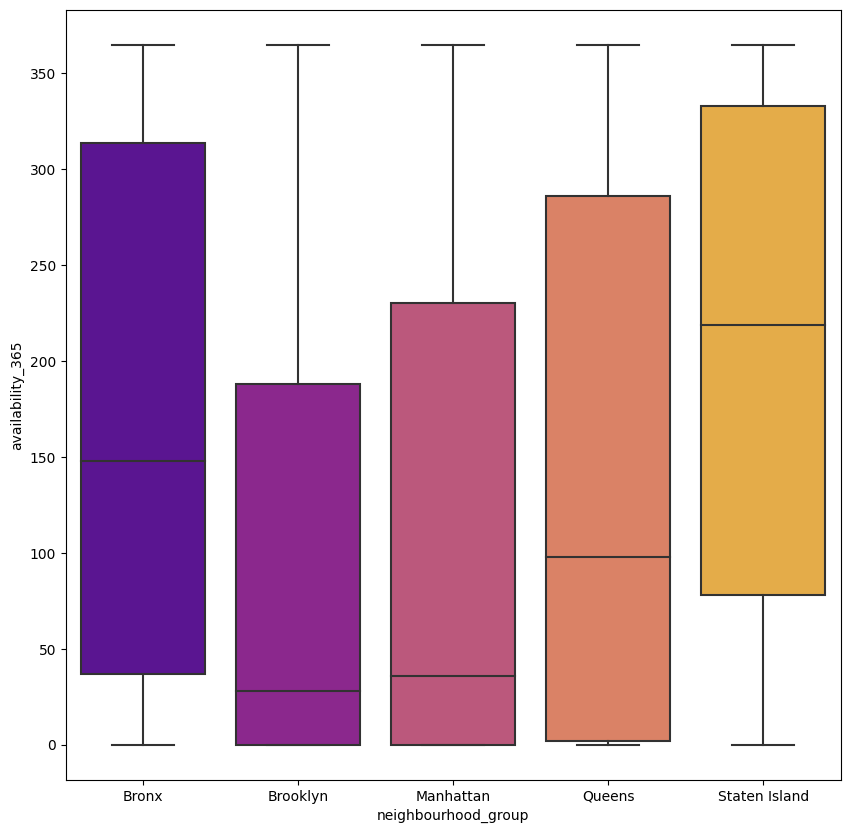

In [30]:
#Relation Between neihgbourgroup and availability
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

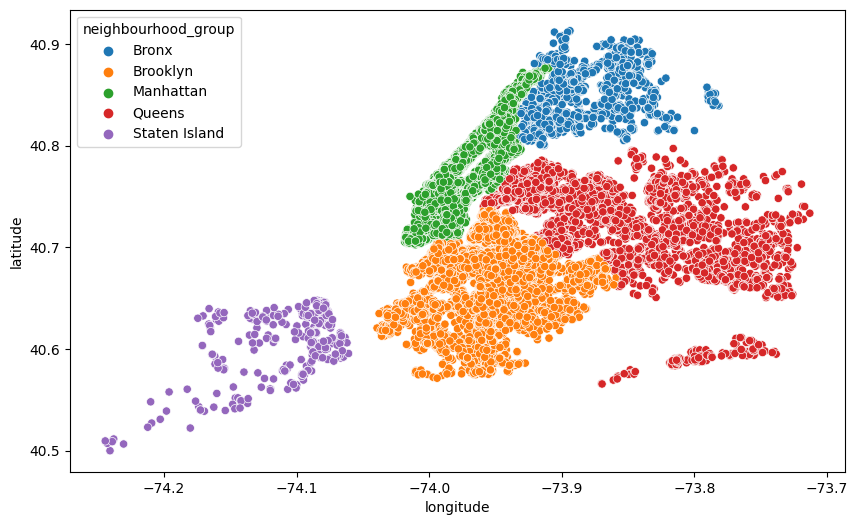

In [31]:
#REgression Analysis
#drrop the colums
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.ioff()

In [32]:
#Map of Neighbourhood
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood)
plt.ioff()

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.room_type)
plt.ioff()

In [34]:
#Availability of Room
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.availability_365)
plt.ioff()

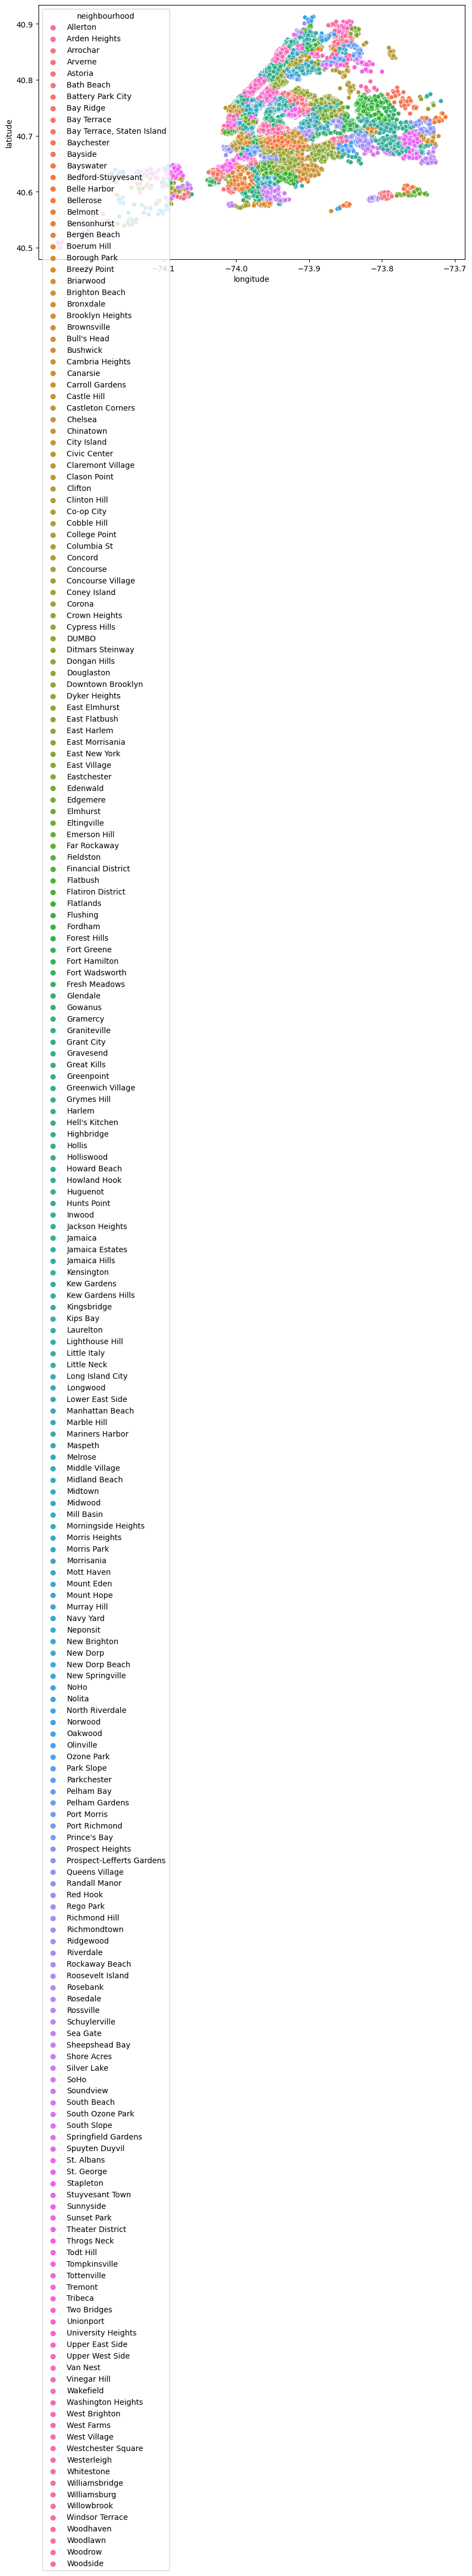

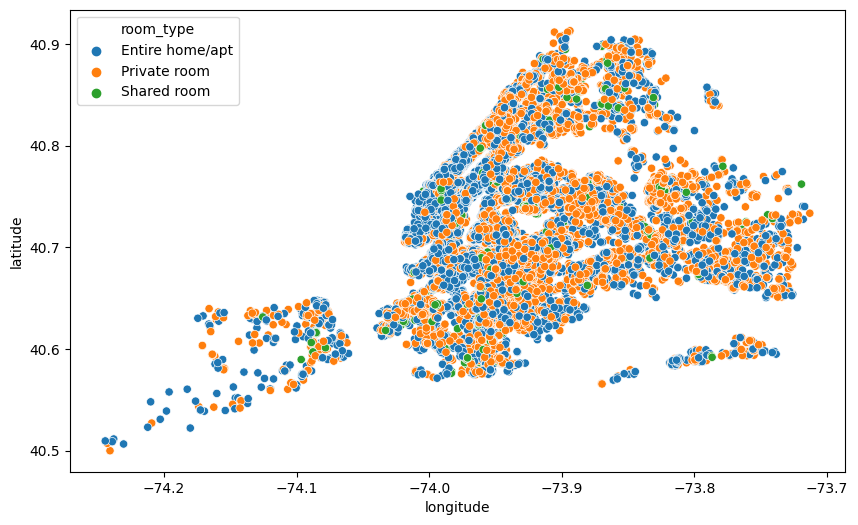

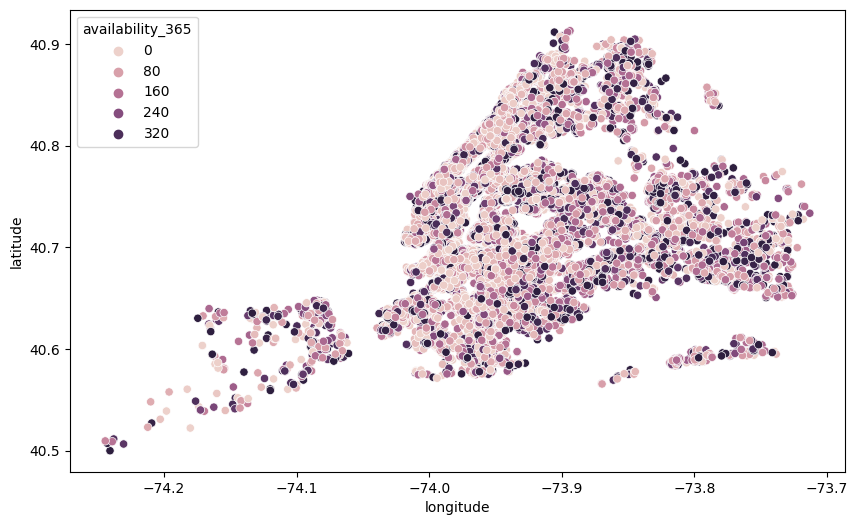

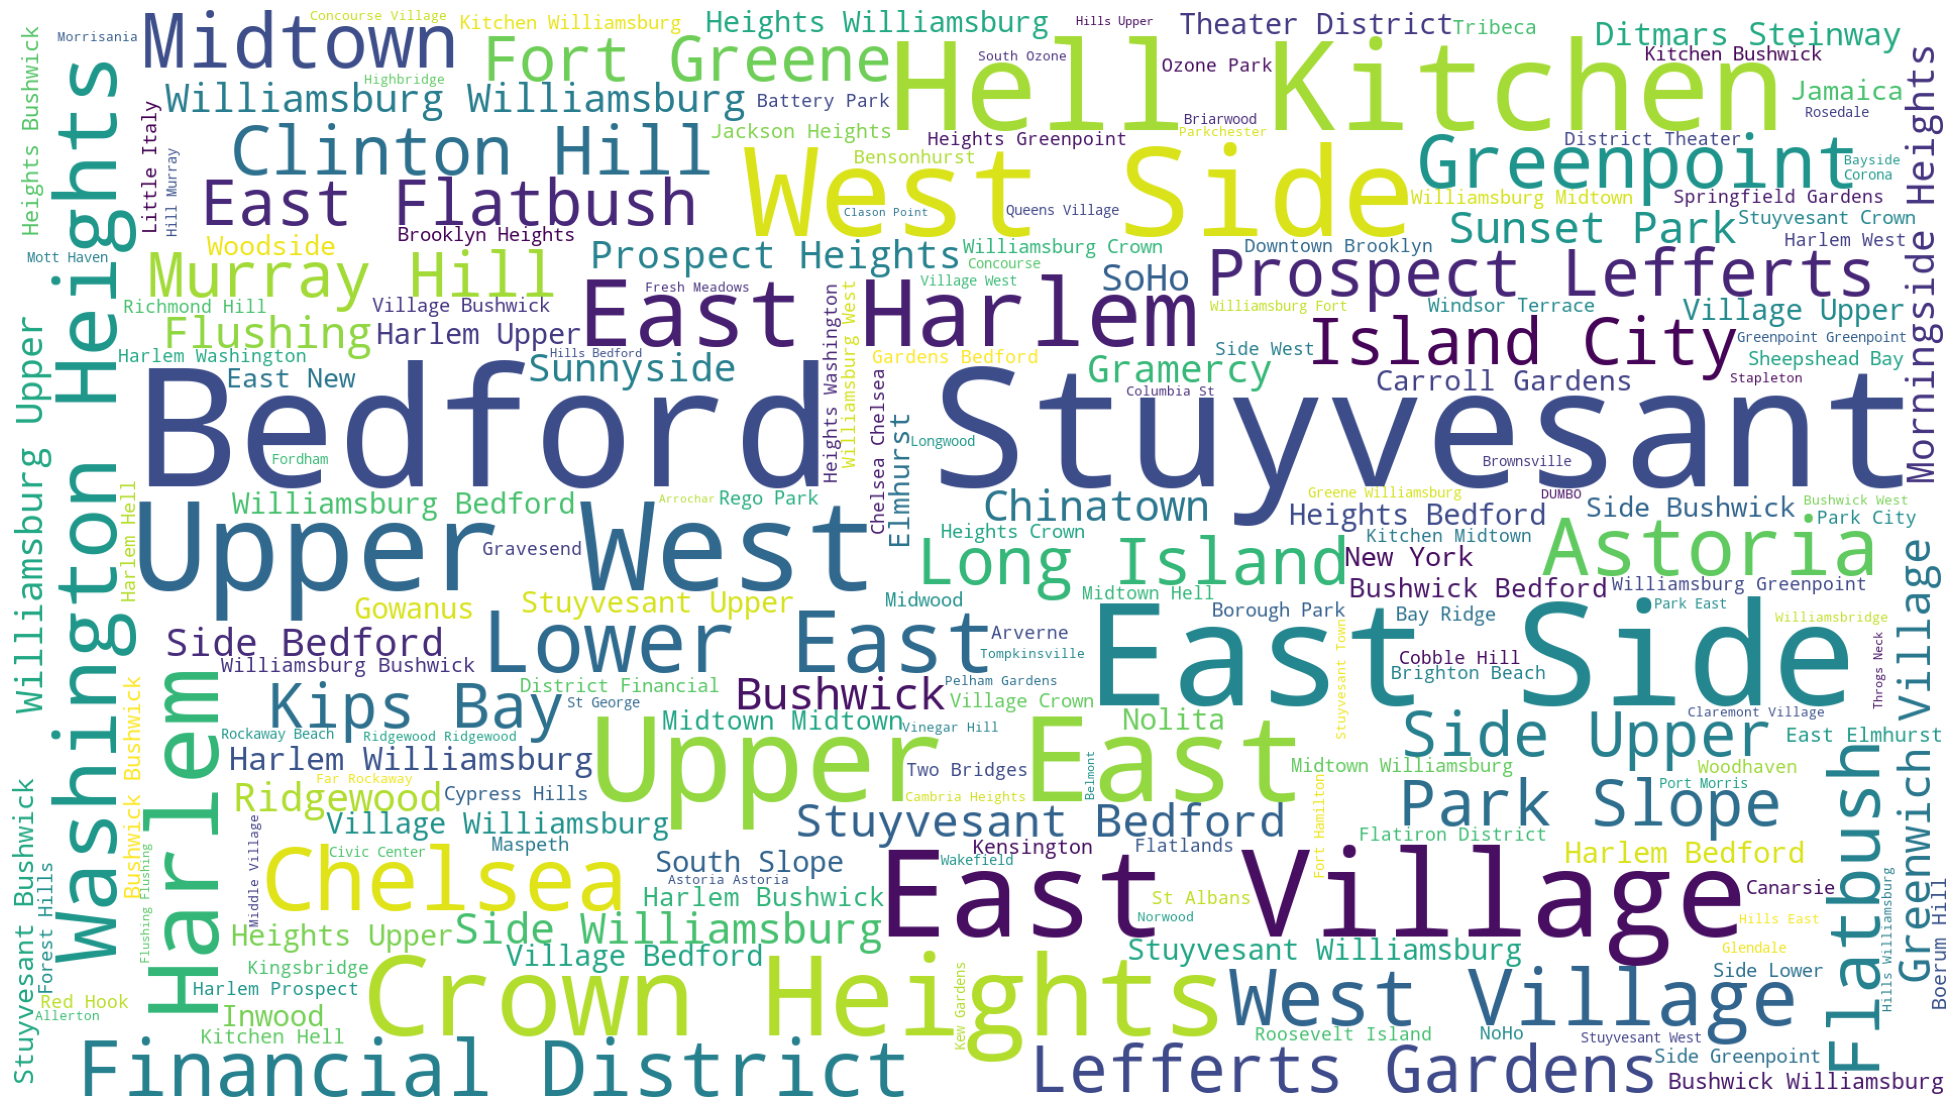

In [35]:
#WordCloud
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [36]:
#Map of Newyork City Airbnb
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [37]:
airbnb.head()

host_id neighbourhood_group neighbourhood  latitude  longitude   
0     2787            Brooklyn    Kensington  40.64749  -73.97237  \
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews   
0     Private room    149               1                  9  \
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
airbnb['neighbourhood_group']= le.fit_transform(airbnb['neighbourhood_group'].astype(str))
airbnb['room_type']= le.fit_transform(airbnb['room_type'].astype(str))


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [41]:
#Defining the independent variables and dependent variables
x = airbnb[['neighbourhood_group','room_type','minimum_nights','calculated_host_listings_count','availability_365']]
y = airbnb['price']
#Getting Test and Training Set
x



neighbourhood_group  room_type  minimum_nights   
0                        1          1               1  \
1                        2          0               1   
2                        2          1               3   
3                        1          0               1   
4                        2          0              10   
...                    ...        ...             ...   
48890                    1          1               2   
48891                    1          1               4   
48892                    2          0              10   
48893                    2          2               1   
48894                    2          1               7   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
4                                   1                 0  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[48895 rows x 5 columns]

In [42]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.head()
y_train.head()

5374      80
37922     60
18450     98
2201      95
14716    100
Name: price, dtype: int64

In [44]:
x_train.shape

(39116, 5)

In [45]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [46]:
y_pred=reg.predict(x_test)
y_pred

array([199.61012131, 204.06601163, 187.69298703, ...,  73.69676791,
        85.52505401, 183.2044986 ])

In [47]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

0.07839577116537932

In [48]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)


DecisionTreeRegressor(min_samples_leaf=0.0001)

In [49]:
y_predict=DTree.predict(x_test)
y_predict

array([ 72.77777778, 125.52857143,  71.47239264, ..., 168.51385042,
       146.1       ,  68.87261146])

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.24770363794636574

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(criterion ="entropy")
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [53]:
rfc_predict= rfc.predict(x_test)
rfc_predict

array([100, 100,  60, ..., 150,  77,  50], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
rfacc = accuracy_score(y_test,rfc_predict)
rfacc

0.06523517382413088